###   워드 클라우드(word cloud)
- '핵심단어를 시각화하는 기법'
- 문서의 키워드, 개념 등을 직관적으로 파악할 수 있도록 핵심 단어를 시각적으로 돋보이게 하는 기법
    - 예를 들면 많이 언급될수록 단어를 크게 표현해 한눈에 들어올 수 있게 하는 기법 등이 있다. 
    - 주로 방대한 양의 정보를 다루는 빅데이터(big data)를 분석할 때 데이터의 특징을 도출하기 위해 활용한다
    
   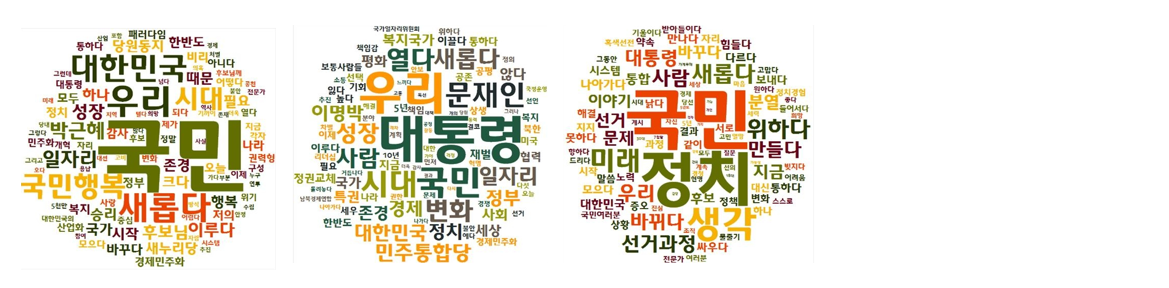
    
    - 출처: https://m.yna.co.kr/view/AKR20120920071800001

In [2]:
#!pip install wordcloud

   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ----- ---------------------------------- 41.0/300.2 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 6.2 MB/s eta 0:00:00


In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# 유니코드에서  음수 부호설정
plt.rc('axes', unicode_minus=False)

▶선택하신 강아지 단어의 출현빈도수는 => 4 번입니다.


(0.0, 10.0)

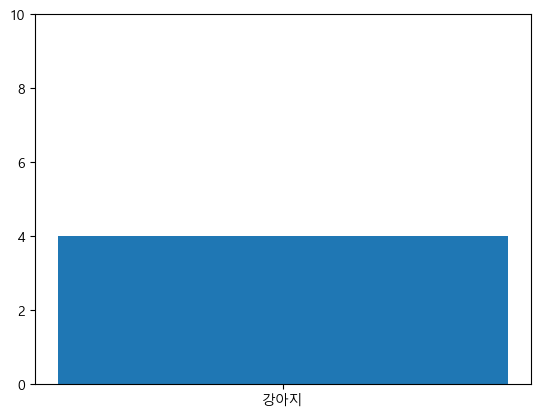

In [4]:
txt='강아지 산책 강아지 목욕 강아지 미용 강아지 쇼핑 친구와 저녁 먹음 가족과 점심 먹음 혼자 저녁 먹음 친구와 쇼핑'
find_word='강아지'
cnt=txt.count(find_word)
print('▶선택하신 %s 단어의 출현빈도수는 => %d 번입니다.' %(find_word,cnt))
plt.bar(find_word,cnt)
plt.ylim(0,10)

In [5]:
#두 개이상의 string를 갖는 리스트구조에서는 한 개의 문자열로 합친후 작업해야함.

txtList=['강아지 산책 강아지 목욕 강아지 미용 강아지 쇼핑',
 '친구와 저녁 먹음 가족과 점심 먹음 혼자 저녁 먹음 친구와 쇼핑']

txt=''.join(txtList)
cnt=txt.count(find_word)
cnt

4

#### [미션 1] ‘강아지’, ‘미용’, ‘친구’ 관련한 자료만 단어별 빈도수를 집계하고, 막대차트와 원차트 제작

['강아지', '미용', '친구'] [4, 1, 2] [57.14285714 14.28571429 28.57142857]


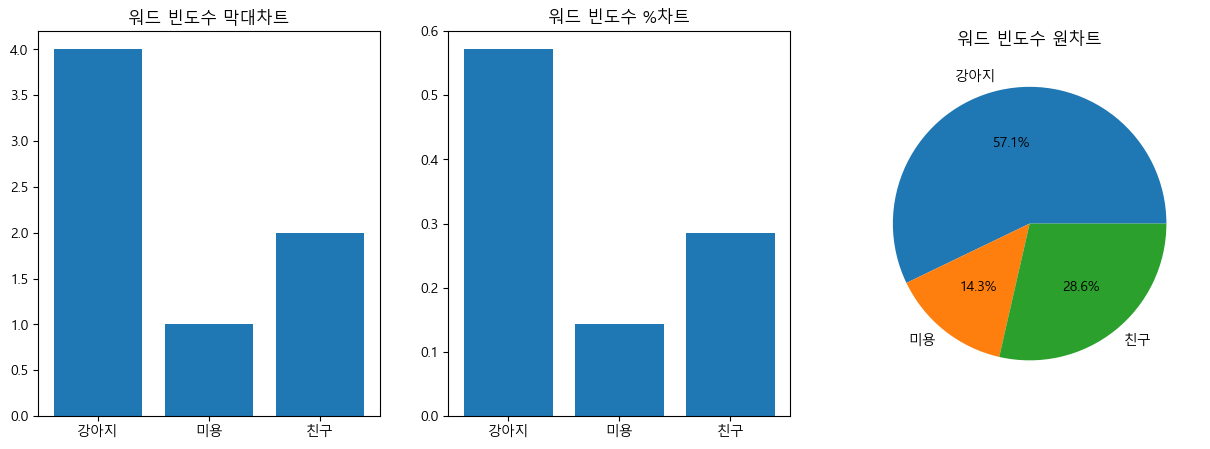

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# 유니코드에서  음수 부호설정
plt.rc('axes', unicode_minus=False)
txtList=['강아지 산책 강아지 목욕 강아지 미용 강아지 쇼핑',
 '친구와 저녁 먹음 가족과 점심 먹음 혼자 저녁 먹음 친구와 쇼핑']
txt=''.join(txtList)
find_word=['강아지','미용','친구'] # # find_word=np.unique(txt.split(' '))
word=[];cnt=[]
for i in find_word:
    word.append(i)
    cnt.append(txt.count(i))
    
percent=np.array(cnt)/sum(cnt)
print(word,cnt,percent*100)
## ----------차트 출력
plt.figure(figsize=(15,5))
plt.subplot(1,3,1) ; plt.bar(word, cnt) ; plt.title('워드 빈도수 막대차트')
plt.subplot(1,3,2) ; plt.bar(word, percent) ; plt.title('워드 빈도수 %차트')
plt.subplot(1,3,3) ; plt.pie(cnt, labels=word, autopct='%1.1f%%', shadow=False)
plt.title('워드 빈도수 원차트') 
plt.show()


### (실습1) 워드클라우드 : wc.generate(txt)
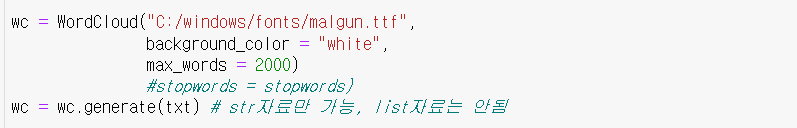

- wc = wc.generate(txt) : txt는 공백으로 분리된 문자열 자료형

In [31]:
txt

'강아지 산책 강아지 목욕 강아지 미용 강아지 쇼핑친구와 저녁 먹음 가족과 점심 먹음 혼자 저녁 먹음 친구와 쇼핑'

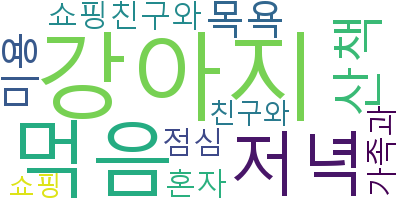

In [16]:
#워드 클라우드
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# 유니코드에서  음수 부호설정
plt.rc('axes', unicode_minus=False)


wc = WordCloud("C:/windows/fonts/malgun.ttf",
               background_color = "white",
               max_words = 2000)
               #stopwords = stopwords)
wc = wc.generate(txt) # str자료만 가능, list자료는 안됨

#matplotlib로 시작화(1)
wc.to_image()

In [20]:
wc.words_

{'강아지': 1.0,
 '먹음': 0.75,
 '저녁': 0.5,
 '산책': 0.25,
 '목욕': 0.25,
 '미용': 0.25,
 '쇼핑친구와': 0.25,
 '가족과': 0.25,
 '점심': 0.25,
 '혼자': 0.25,
 '친구와': 0.25,
 '쇼핑': 0.25}

### (실습2) 워드클라우드 : wc.generate_from_frequencies(w_dict)
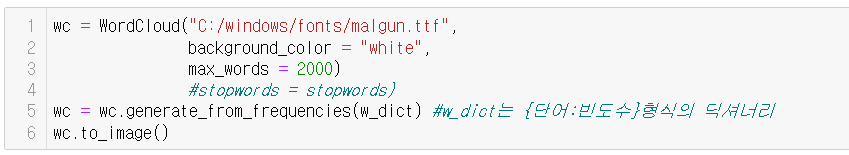
- wc.generate_from_frequencies(w_dict) : w_dict는 {단어:빈도수}형식의 딕셔너리 자료형

In [23]:
word

['강아지', '미용', '친구']

In [24]:
cnt

[4, 1, 2]

In [25]:
w_dict={i:j for i,j in zip(word,cnt)}
w_dict

{'강아지': 4, '미용': 1, '친구': 2}

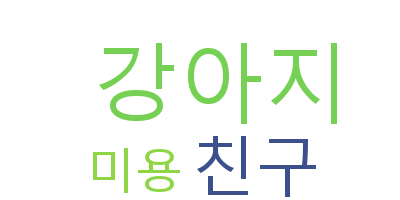

In [32]:
wc = WordCloud("C:/windows/fonts/malgun.ttf",
               background_color = "white",
               max_words = 2000)
               #stopwords = stopwords)
wc = wc.generate_from_frequencies(w_dict) #w_dict는 {단어:빈도수}형식의 딕셔너리
wc.to_image()